In [17]:
import pickle
import matplotlib.pyplot as plt
import sqlite3
from pathlib import Path

from shared_elements import read_party_report_table

In [18]:


read_party_report_table()

,party_analysis_id,report_id,fight_id,analysis_id_1,analysis_id_2,analysis_id_3,analysis_id_4,analysis_id_5,analysis_id_6,analysis_id_7,analysis_id_8
0,4f9811a3-c9c6-4b94-bd3a-01b7e25d3c57,vLCj2HyYkZRXBxbP,46,f8c8d53e-bc74-4f7a-b13a-21dbc49bbf19,dd30b174-8c72-4a05-a830-4a4f97b0f423,303ba234-1779-468a-8456-ccf488e49dcd,dc1a702e-100a-4685-9cc1-3a767a520337,09c70f6f-36ef-429f-9c13-e3705773dc77,0dc60c94-17cd-45c8-aa14-990b873de8e2,776d2f26-8f41-4b32-8095-fe825fb4ad72,c12b6639-2db9-45a7-823a-5ff6c78b0f24


In [59]:
with open(
    data_path
    / "blobs/party-analyses/party-analysis-4f9811a3-c9c6-4b94-bd3a-01b7e25d3c57.pkl",
    "rb",
) as f:
    party_rotation = pickle.load(f)

(34000000.0, 38000000.0)

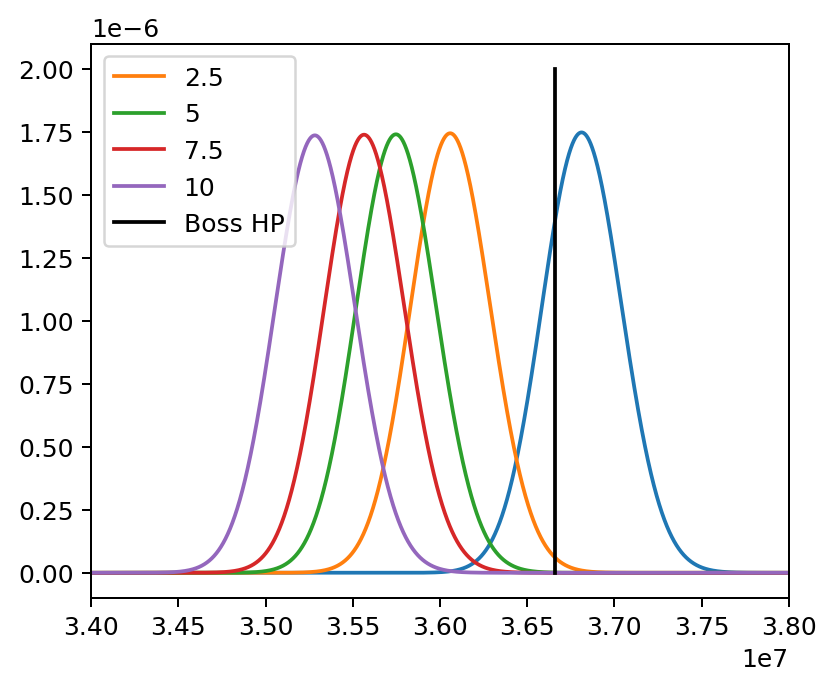

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=180)
plt.plot(party_rotation.party_damage_support, party_rotation.party_damage_distribution)
for p in party_rotation.shortened_rotations:
    plt.plot(
        p.shortened_damage_support,
        p.shortened_damage_distribution,
        label=p.seconds_shortened,
    )

plt.plot([36660084, 36660084], [0, 2e-6], color="k", label="Boss HP")
plt.legend()
plt.xlim([3.4e7, 3.8e7])

In [61]:
analyses = [
    "f8c8d53e-bc74-4f7a-b13a-21dbc49bbf19",
    "dd30b174-8c72-4a05-a830-4a4f97b0f423",
    "303ba234-1779-468a-8456-ccf488e49dcd",
    "dc1a702e-100a-4685-9cc1-3a767a520337",
    "09c70f6f-36ef-429f-9c13-e3705773dc77",
    "0dc60c94-17cd-45c8-aa14-990b873de8e2",
    "776d2f26-8f41-4b32-8095-fe825fb4ad72",
    "c12b6639-2db9-45a7-823a-5ff6c78b0f24",
]

a = analyses[6]
with open(
    data_path / f"blobs/rotation-object-{a}.pkl", "rb"
) as f:
    rotation = pickle.load(f)

with open(
    data_path / "blobs" / "job-rotation-clippings" / f"rotation-clippings-{a}.pkl", "rb"
) as f:
    clipping = pickle.load(f)
rotation.actions_df.tail(8)

,timestamp,elapsed_time,type,sourceID,targetID,abilityGameID,ability_name,buffs,amount,tick,...,action_name,p_n,p_c,p_d,p_cd,main_stat_add,l_c,normalized_damage,relative_damage,pp_buff
672,1714440265215,413.053,damage,1,10,1001200,Caustic Bite (tick),"[1000049, 1000125, 1000141, 1000638, 1001221, ...",1908,True,...,Caustic Bite (tick)-1000049_1000125_1000141_10...,0.315673,0.211327,0.283327,0.189673,262,1631.0,1410.845021,NaN,NaN
673,1714440265437,413.275,calculateddamage,1,10,16495,Burst Shot,[1002216],11196,NaN,...,Burst Shot-1002216,0.508173,0.218827,0.190827,0.082173,0,1631.0,11196.000000,NaN,NaN
674,1714440266952,414.790,calculateddamage,1,10,8,Shot,[1002216],2605,NaN,...,Shot-1002216,0.508173,0.218827,0.190827,0.082173,0,1631.0,2605.000000,NaN,NaN
675,1714440267887,415.725,calculateddamage,1,10,16495,Burst Shot,[1002216],9051,NaN,...,Burst Shot-1002216,0.508173,0.218827,0.190827,0.082173,0,1631.0,9051.000000,NaN,NaN
676,1714440268245,416.083,damage,1,10,1001201,Stormbite (tick),"[1000049, 1000125, 1000141, 1000638, 1001221, ...",1876,True,...,Stormbite (tick)-1000049_1000125_1000141_10006...,0.315673,0.211327,0.283327,0.189673,262,1631.0,1387.183050,NaN,NaN
677,1714440268245,416.083,damage,1,10,1001200,Caustic Bite (tick),"[1000049, 1000125, 1000141, 1000638, 1001221, ...",1497,True,...,Caustic Bite (tick)-1000049_1000125_1000141_10...,0.315673,0.211327,0.283327,0.189673,262,1631.0,1106.936581,NaN,NaN
678,1714440268871,416.709,calculateddamage,1,10,3558,Empyreal Arrow,[1002216],9884,NaN,...,Empyreal Arrow-1002216,0.508173,0.218827,0.190827,0.082173,0,1631.0,9884.000000,NaN,NaN
679,1714440270029,417.867,calculateddamage,1,10,8,Shot,[1002216],5612,NaN,...,Shot-1002216,0.508173,0.218827,0.190827,0.082173,0,1631.0,5612.000000,NaN,NaN


In [62]:
rotation.make_rotation_df(rotation.actions_df, t_end_clip=2.5, return_clipped=True)

,action_name,base_action,n,p_n,p_c,p_d,p_cd,buffs,l_c,main_stat_add,potency,damage_type
0,Empyreal Arrow-1002216,Empyreal Arrow,1,0.508173,0.218827,0.190827,0.082173,1.0,1631.0,0,240,direct
1,Shot-1002216,Shot,1,0.508173,0.218827,0.190827,0.082173,1.0,1631.0,0,80,auto


In [63]:
clipping.rotation_clipping[0]

,action_name,base_action,n,p_n,p_c,p_d,p_cd,buffs,l_c,main_stat_add,potency,damage_type,d2,is_dot
0,Empyreal Arrow-1002216,Empyreal Arrow,1,0.508173,0.218827,0.190827,0.082173,1.0,1631.0,0,240,direct,9440.0,0
1,Shot-1002216,Shot,1,0.508173,0.218827,0.190827,0.082173,1.0,1631.0,0,80,auto,2664.0,0


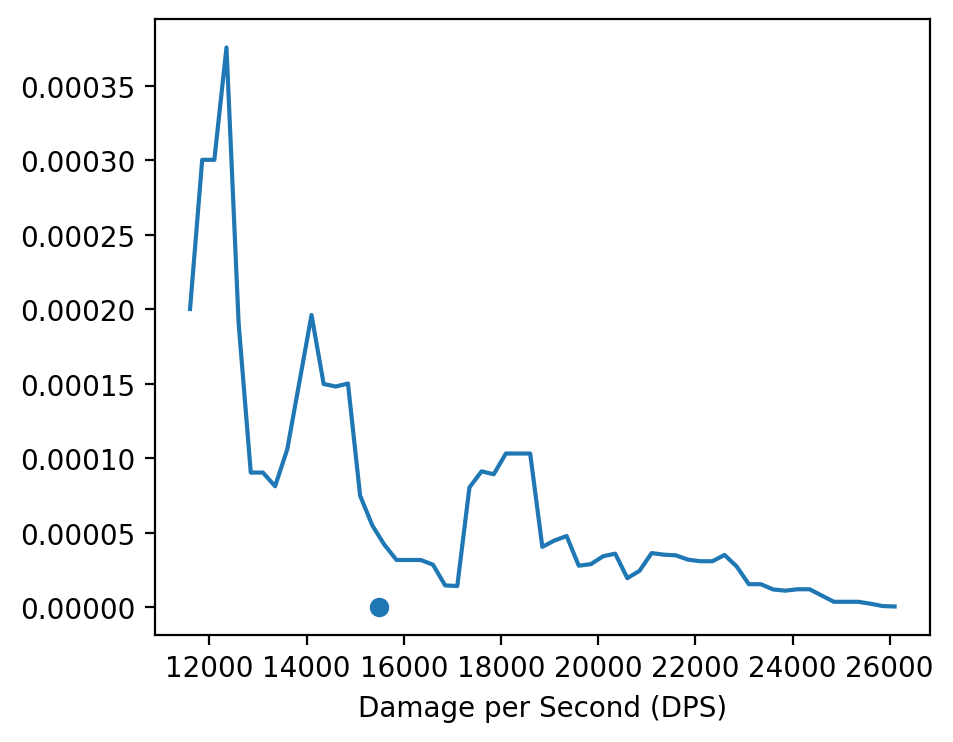

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(5,4), dpi=200)
clipping.analysis_clipping[0].plot_rotation_distribution(ax=ax)
ax.scatter([9884 + 5614], [0])

In [58]:
clipping.analysis_clipping[0].rotation_dps_support

array([11400, 11650, 11900, 12150, 12400, 12650, 12900, 13150, 13400,
       13650, 13900, 14150, 14400, 14650, 14900, 15150, 15400, 15650,
       15900, 16150, 16400, 16650, 16900, 17150, 17400, 17650, 17900,
       18150, 18400, 18650, 18900, 19150, 19400, 19650, 19900, 20150,
       20400, 20650, 20900, 21150, 21400, 21650, 21900, 22150, 22400,
       22650, 22900, 23150, 23400, 23650, 23900, 24150, 24400, 24650,
       24900, 25150, 25400, 25650])

In [60]:
party_rotation

PartyRotation(party_id='4f9811a3-c9c6-4b94-bd3a-01b7e25d3c57', boss_hp=36660084, party_damage_distribution=array([ 2.95253010e-24,  0.00000000e+00, -1.47626505e-23, ...,
        2.57071772e-23,  5.47729520e-24,  3.08004489e-23]), party_damage_support=array([28001763, 28002013, 28002263, ..., 58879263, 58879513, 58879763]), shortened_rotations=[PartyRotationClipping(seconds_shortened=2.5, boss_hp=36660084, shortened_damage_distribution=array([-4.59544784e-23, -4.93585138e-23, -4.93585138e-23, ...,
       -2.85130566e-23, -1.87967891e-23, -9.92737528e-24]), shortened_damage_support=array([27216000, 27216250, 27216500, ..., 58207500, 58207750, 58208000]), damage_distribution_clipping=array([1.54822251e-11, 1.23857801e-10, 5.18654542e-10, 1.57156141e-09,
       3.91343148e-09, 8.47390297e-09, 1.64722300e-08, 2.94265558e-08,
       4.91395732e-08, 7.76333048e-08, 1.17144142e-07, 1.70112868e-07,
       2.39061909e-07, 3.26515353e-07, 4.34941624e-07, 5.66597223e-07,
       7.23477920e-07, 9.0